# Iris

**Іриси Фішера** (англ. Iris flower data set) — це багатовимірний набір даних для задачі класифікації, на прикладі якого англійський статистик та біолог Рональд Фішер в 1936 році продемонстрував роботу розробленого ним методу дискримінантного аналізу. Іноді його також називають ірисами Андерсона — через те, що дані були зібрані американським ботаніком Едгаром Андерсоном. Цей набір даних став класичним і часто використовується в літературі для ілюстрації роботи різних статистичних алгоритмів. 
Цей датасет можна знайти тут:
* https://www.kaggle.com/uciml/iris

![title](IT2.jpg)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
iris = pd.read_csv("Iris.csv")
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Перевіримо чи в датасеті є нульові значення

In [2]:
# Display the number of null data observations
iris.isnull().values.sum()

0

Як бачимо, в датасеті такі значення відсутні

## Опис даних
Іриси Фішера складаються з даних про 150 вимірювань ірисів з трьох видів — Iris setosa, Iris virginica і Iris versicolor, по 50 вимірювань на вид. Для кожного екземпляра вимірювалися чотири характеристики (в сантиметрах):

    Довжина зовнішньої частки оцвітини (англ. sepal length);
    Ширина зовнішньої частки оцвітини (англ. sepal width);
    Довжина внутрішньої частки оцвітини (англ. petal length);
    Ширина внутрішньої частки оцвітини (англ. petal width).

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

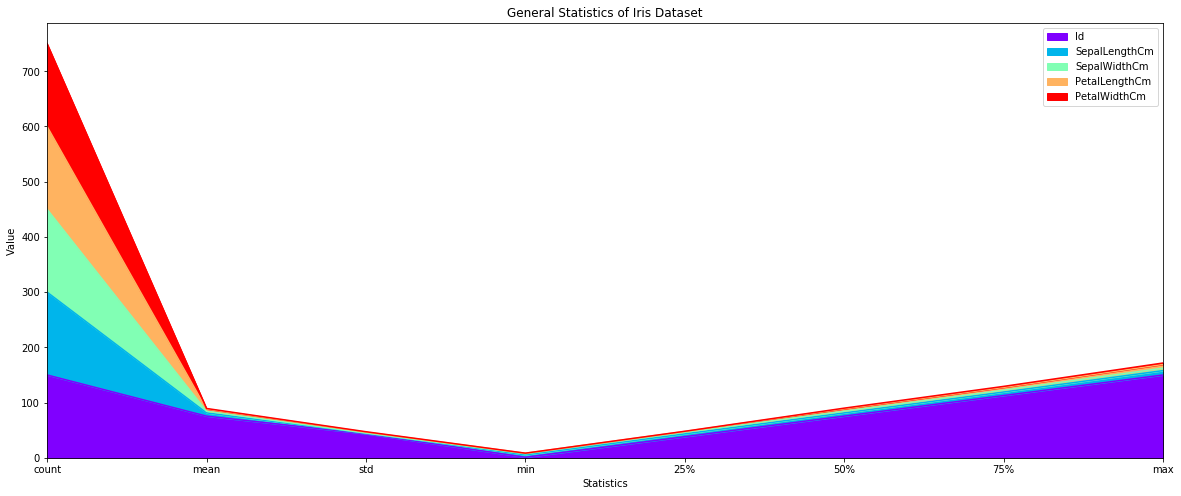

In [3]:
iris.describe().plot(kind = "area",fontsize=10, figsize = (20,8),colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

### Маємо 50 екземплярів кожного виду в датасеті

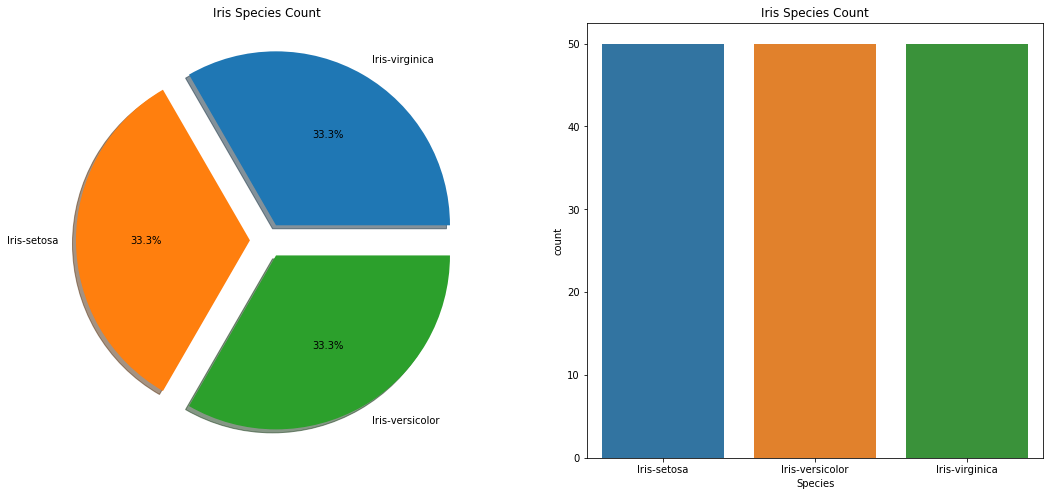

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))
#iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
ax[0].set_ylabel('')
sns.countplot('Species',data=iris,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()

### Візуалізуємо кожен вид ірисів окремо

<table cellspacing="0">
   <tr>
    <th>&nbsp;</th><th>Назва</th>
   </tr>
   <tr>
    <td><img src="setosa.jpg" width=100 height=100 /></td><td>setosa</td>
   </tr>
   <tr>
    <td><img src="versicolor.jpg" width=100 height=100 /></td><td>versicolor</td>
   </tr>
   <tr>
    <td><img src="virginica.jpg" width=100 height=100 /></td><td>virginica</td>
   </tr>
  </table>

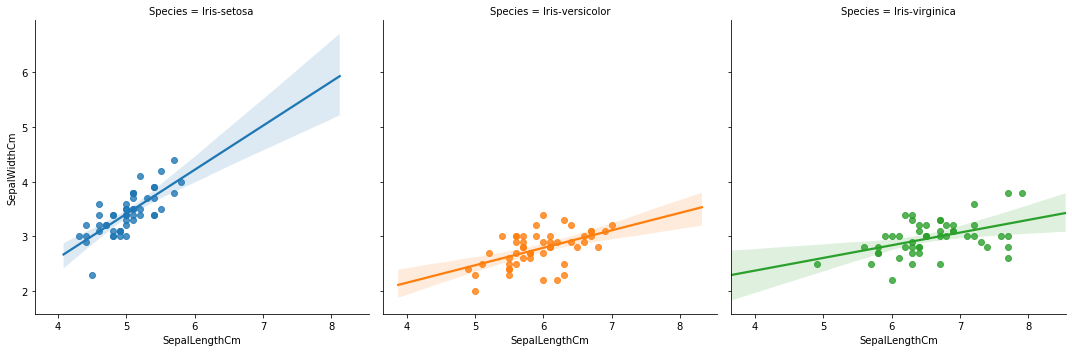

In [5]:
sns.lmplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, hue = 'Species', col = 'Species')

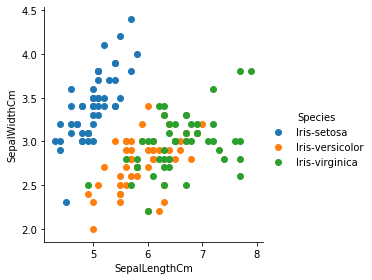

In [6]:
sns.FacetGrid(iris,hue='Species',height=4)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

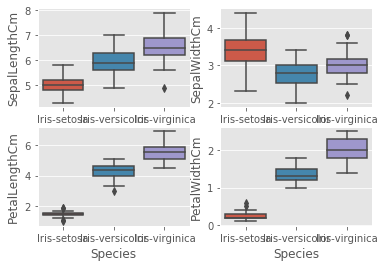

In [7]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris)


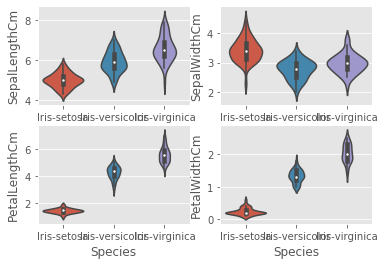

In [8]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris)

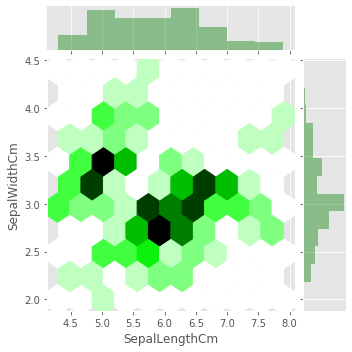

In [9]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5, kind='hex',color='green')
plt.show()

### Подивимося на кореляцію

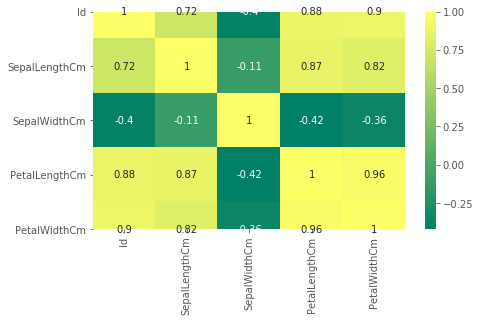

In [10]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='summer')

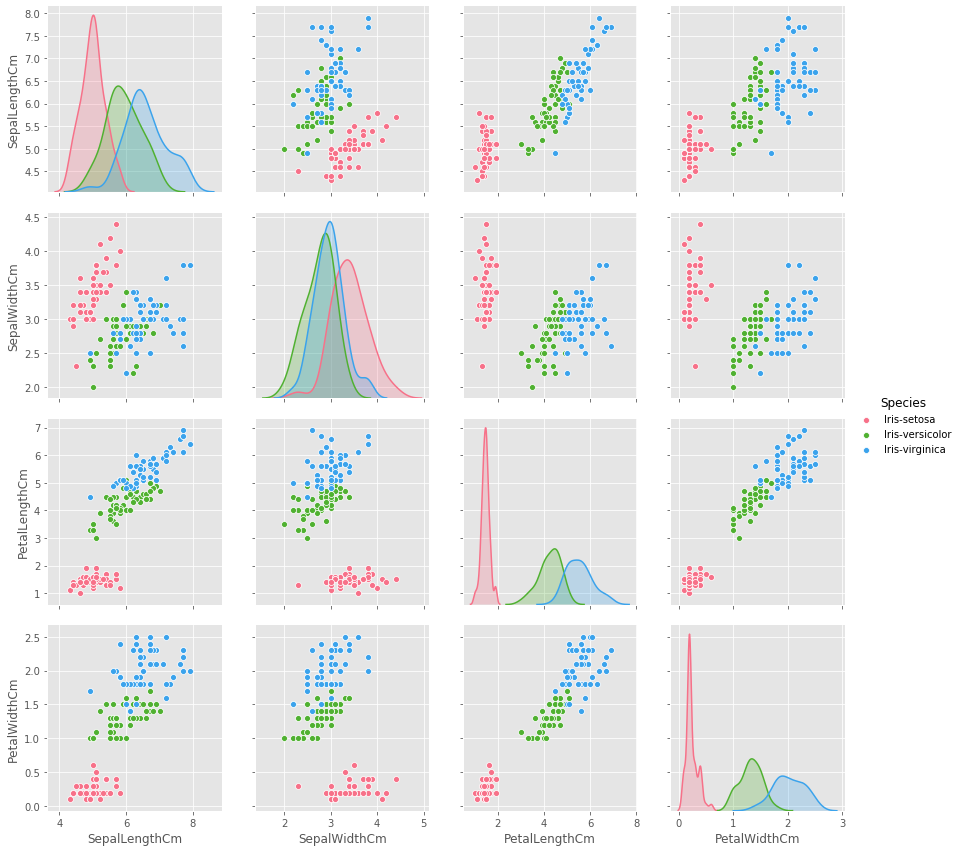

In [11]:
plt.close();
sns.pairplot(iris.drop("Id", axis=1), hue="Species", palette="husl", height=3)
plt.show()

Ми можемо бачити, що кожен запис має id, проте він не має значення для нашого аналізу, тому ми видалимо його.

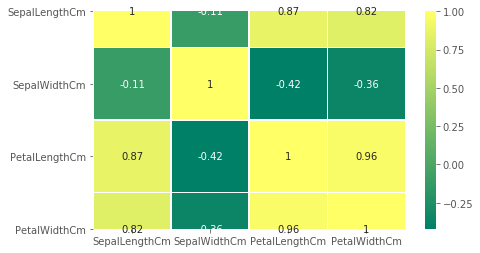

In [12]:
iris=iris.drop("Id", axis=1)
fig_1 = plt.figure(figsize=(7,4))
new_correlations = iris.corr()
sns.heatmap(new_correlations,linewidths=.5,annot=True,cmap='summer')
plt.show()

Поглянувши на графік, можна помітити що багато ознак мають дуже високий коефіціент кореляції. Тому доцільним, є знайти кореляції вищим, наприклад, за 0.75 

In [13]:
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1,-,0.871754,0.817954
SepalWidthCm,-,1,-,-
PetalLengthCm,0.871754,-,1,0.962757
PetalWidthCm,0.817954,-,0.962757,1


* По sepal_length і sepal_width фічам можна відрізнити Setosa від всіх інших
* PetalLengthCm nf PetalWidthCm є хорошими фічами для візуалізації різниці між видами

### PetalLengthCm та PetalWidthCm в гістограмах

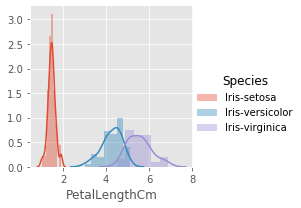

In [14]:
sns.FacetGrid(iris, hue="Species", height=3).map(sns.distplot, "PetalLengthCm").add_legend();
plt.show();

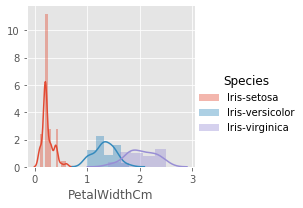

In [15]:
sns.FacetGrid(iris, hue="Species", height=3).map(sns.distplot, "PetalWidthCm").add_legend();
plt.show();

## Логістична регресія

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [17]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

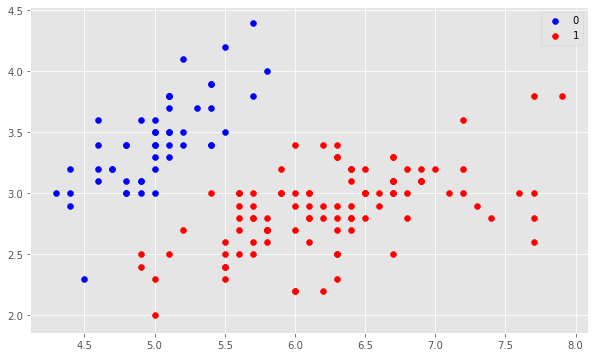

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [19]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # ініціалізація ваги
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [20]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(X, y)

Wall time: 12.4 s


In [21]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [22]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

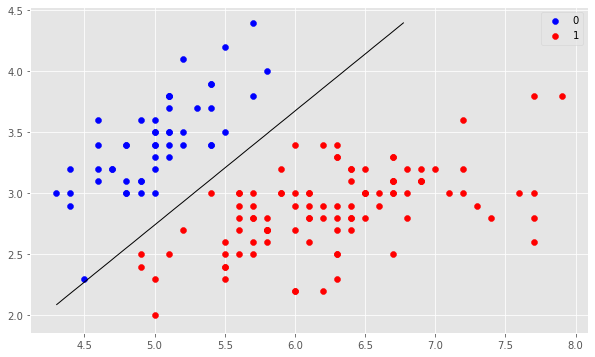

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

## Sklearn Реалізація

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20,solver = 'lbfgs')
%time model.fit(X, y)

Wall time: 5.99 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [26]:
model.intercept_, model.coef_

(array([-276.67727716]), array([[ 134.80324426, -147.37951668]]))